In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
from scipy.stats import norm
import seaborn as sns

In [2]:
cricdata = pd.read_csv("/Users/meetsudra/Documents/GitHub/myprojects/datasets/ICC Test Bat 3001 copy.csv")
cricdata

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2997,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2998,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2999,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...


#### removing profile column

In [3]:
cricdata.drop(columns="Player Profile",inplace=True)

#### removing last few rows which have null values 

In [4]:
cricdata.tail(20)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
2981,Ali Hussain Rizvi (PAK),1997-1997,1,-,-,-,-,-,-,-,-
2982,PJ Allan (AUS),1965-1965,1,-,-,-,-,-,-,-,-
2983,JC Clay (ENG),1935-1935,1,-,-,-,-,-,-,-,-
2984,DJ Cullen (AUS),2006-2006,1,-,-,-,-,-,-,-,-
2985,HT Dani (INDIA),1952-1952,1,-,-,-,-,-,-,-,-
2986,Farrukh Zaman (PAK),1976-1976,1,-,-,-,-,-,-,-,-
2987,AB Howard (WI),1972-1972,1,-,-,-,-,-,-,-,-
2988,A Khan (ENG),2009-2009,1,-,-,-,-,-,-,-,-
2989,JCW MacBryan (ENG),1924-1924,1,-,-,-,-,-,-,-,-
2990,LR Pierre (WI),1948-1948,1,-,-,-,-,-,-,-,-


In [5]:
cricdata.drop(index=range(2981,3001),inplace=True)

In [6]:
cricdata.tail(20)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
2961,RL Park (AUS),1920-1921,1,1,0,0,0,0,0,0,1
2962,RGM Patel (INDIA),1988-1988,1,2,0,0,0,0,0,0,2
2963,KK Peters (WI),2014-2014,1,1,0,0,0,0,0,0,1
2964,HJ Rhodes (ENG),1959-1959,2,1,1,0,0*,-,0,0,0
2965,LA Roberts (WI),1999-1999,1,1,0,0,0,0,0,0,1
2966,CG Rowe (NZ),1946-1946,1,2,0,0,0,0,0,0,2
2967,CJ Sayers (AUS),2018-2018,1,2,0,0,0,0,0,0,2
2968,TAP Sekhar (INDIA),1983-1983,2,1,1,0,0*,-,0,0,0
2969,RHD Sellers (AUS),1964-1964,1,1,0,0,0,0,0,0,1
2970,R Singh (INDIA),1999-1999,1,1,0,0,0,0,0,0,1


In [7]:
cricdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  2981 non-null   object
 1   Span    2981 non-null   object
 2   Mat     2981 non-null   int64 
 3   Inn     2981 non-null   object
 4   NO      2981 non-null   object
 5   Runs    2981 non-null   object
 6   HS      2981 non-null   object
 7   Avg     2981 non-null   object
 8   100     2981 non-null   object
 9   50      2981 non-null   object
 10  0       2981 non-null   object
dtypes: int64(1), object(10)
memory usage: 256.3+ KB


#### converting object column to numeric

In [8]:
cols = ["Inn","NO","Runs","HS","100","50",'0']
for col in cols :
    cricdata[col] = cricdata[col].astype(str).str.replace(r"[^0-9]","",regex=True)
    cricdata[col] = pd.to_numeric(cricdata[col])

#### replacing "-" values using a Null value 

In [9]:
cricdata["Avg"] = cricdata["Avg"].replace("-",np.nan)
cricdata["Avg"] = pd.to_numeric(cricdata["Avg"])

In [10]:
cricdata[cricdata["Avg"].isnull()].head(60)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
1958,Afaq Hussain (PAK),1961-1964,2,4,4,66,35,NaN,0,0,0
2067,SG Law (AUS),1995-1995,1,1,1,54,54,NaN,0,1,0
2308,CG Halse (SA),1964-1964,3,3,3,30,19,NaN,0,0,0
2335,FAW Freer (AUS),1946-1946,1,1,1,28,28,NaN,0,0,0
2363,IW Callen (AUS),1978-1978,1,2,2,26,22,NaN,0,0,0
2383,LJ Johnson (AUS),1948-1948,1,1,1,25,25,NaN,0,0,0
2404,AM Miller (ENG),1896-1896,1,2,2,24,20,NaN,0,0,0
2440,W Bell (NZ),1954-1954,2,3,3,21,21,NaN,0,0,0
2522,Niaz Ahmed (PAK),1967-1969,2,3,3,17,16,NaN,0,0,0
2538,Muhammad Musa (PAK),2019-2019,1,2,2,16,12,NaN,0,0,0


#### If you see the data of those players whose average score is null, their total innnings played and not out score is equal thus technically their average score is undefined and hence kept null

#### avg run = totalruns / innings played - not out 

In [11]:
cricdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2981 non-null   object 
 1   Span    2981 non-null   object 
 2   Mat     2981 non-null   int64  
 3   Inn     2981 non-null   int64  
 4   NO      2981 non-null   int64  
 5   Runs    2981 non-null   int64  
 6   HS      2981 non-null   int64  
 7   Avg     2913 non-null   float64
 8   100     2981 non-null   int64  
 9   50      2981 non-null   int64  
 10  0       2981 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 256.3+ KB


#### Split "Span" column and convert it to numeric column

In [12]:
cricdata["Span"].dtype

cricdata[["Startdate","Lastdate"]] = cricdata["Span"].str.split("-",expand=True)
cricdata["Startdate"] = pd.to_numeric(cricdata["Startdate"])
cricdata["Lastdate"] = pd.to_numeric(cricdata["Lastdate"])

#### Reorder columns

In [13]:
cols = ["Player","Startdate","Lastdate"] + [col for col in cricdata.columns if col not in ['Player', 'Startdate', 'Lastdate']] 
cricdata = cricdata[cols]

# removing span col 
cricdata.drop(columns="Span",inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1178/3560133042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricdata.drop(columns="Span",inplace=True)


In [14]:
cricdata.head(5)

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0
0,SR Tendulkar (INDIA),1989,2013,200,329,33,15921,248,53.78,51,68,14
1,RT Ponting (AUS),1995,2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995,2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/INDIA),1996,2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006,2018,161,291,16,12472,294,45.35,33,57,9


## Lets start with Career Length Analysis 

In [15]:
cricdata["career_length"] = cricdata["Lastdate"] - cricdata["Startdate"] + 1
cricdata["career_length"].describe()

count    2981.000000
mean        5.539081
std         4.940610
min         1.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        32.000000
Name: career_length, dtype: float64

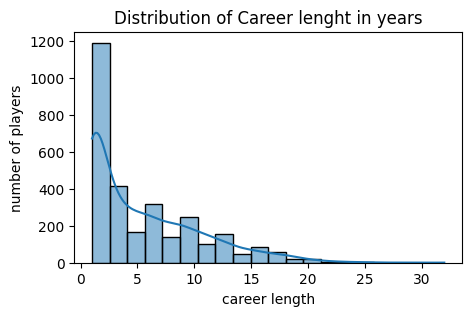

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(cricdata["career_length"],bins=20,kde=True)
plt.title("Distribution of Career lenght in years")
plt.xlabel("career length")
plt.ylabel("number of players")
plt.show()

most of the players seems to play for test matches for few years. the data is highly positively skewed

In [17]:
cricdata.sort_values(by='career_length',ascending=False).head()

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0,career_length
266,W Rhodes (ENG),1899,1930,58,98,21,2325,179,30.19,2,11,6,32
613,DB Close (ENG),1949,1976,22,37,2,887,70,25.34,0,4,3,28
175,FE Woolley (ENG),1909,1934,64,98,7,3283,154,36.07,5,23,13,26
0,SR Tendulkar (INDIA),1989,2013,200,329,33,15921,248,53.78,51,68,14,25
283,GA Headley (WI),1930,1954,22,40,4,2190,270,60.83,10,5,2,25


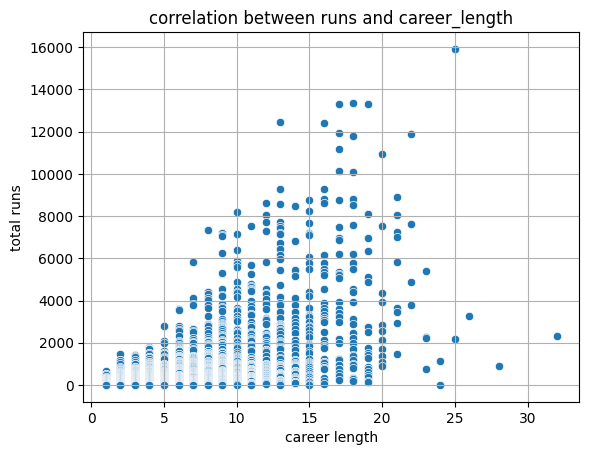

In [18]:
sns.scatterplot(x='career_length',y='Runs', data=cricdata)
plt.title("correlation between runs and career_length")
plt.xlabel("career length")
plt.ylabel("total runs")
plt.grid(True)
plt.show()

plot definately shows linearity to some extent. But it also indicates that runs are not influenced by career length only

## Lets compute Runs Per Match

In [19]:
cricdata["runs_per_match"] = cricdata["Runs"]/cricdata["Mat"]
cricdata.sort_values(by="runs_per_match",ascending=False)

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0,career_length,runs_per_match
1477,RE Redmond (NZ),1973,1973,1,2,0,163,107,81.50,1,1,0,1,163.000000
1109,Abid Ali (PAK),2019,2019,2,3,1,321,174,160.50,2,0,0,1,160.500000
52,DG Bradman (AUS),1928,1948,52,80,10,6996,334,99.94,29,13,7,21,134.538462
870,BA Richards (SA),1970,1970,4,7,0,508,140,72.57,2,2,0,1,127.000000
1262,PP Shaw (INDIA),2018,2018,2,3,1,237,134,118.50,1,1,0,1,118.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,AK Kuruppuarachchi (SL),1986,1987,2,2,2,0,0,NaN,0,0,0,2,0.000000
2950,IB Leggat (NZ),1954,1954,1,1,0,0,0,0.00,0,0,1,1,0.000000
2951,PT Lewis (SA),1913,1913,1,2,0,0,0,0.00,0,0,2,1,0.000000
2952,JW McLaren (AUS),1912,1912,1,2,2,0,0,NaN,0,0,0,1,0.000000


runs_per_match can be misleading as we can see Player named Redmond just played for 1 match and thus making him falsely appear efficient. Wherease other players like Bradman who played for 2 decades are behind of him.

## Lets compute Runs per Inning 

In [20]:
cricdata["runs_per_inning"] = cricdata["Runs"]/cricdata["Inn"]
cricdata.sort_values(by="runs_per_inning", ascending=False)

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0,career_length,runs_per_match,runs_per_inning
1668,AG Ganteaume (WI),1948,1948,1,1,0,112,112,112.00,1,0,0,1,112.000000,112.00
1109,Abid Ali (PAK),2019,2019,2,3,1,321,174,160.50,2,0,0,1,160.500000,107.00
1762,VH Stollmeyer (WI),1939,1939,1,1,0,96,96,96.00,0,1,0,1,96.000000,96.00
52,DG Bradman (AUS),1928,1948,52,80,10,6996,334,99.94,29,13,7,21,134.538462,87.45
1477,RE Redmond (NZ),1973,1973,1,2,0,163,107,81.50,1,1,0,1,163.000000,81.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,AK Kuruppuarachchi (SL),1986,1987,2,2,2,0,0,NaN,0,0,0,2,0.000000,0.00
2950,IB Leggat (NZ),1954,1954,1,1,0,0,0,0.00,0,0,1,1,0.000000,0.00
2951,PT Lewis (SA),1913,1913,1,2,0,0,0,0.00,0,0,2,1,0.000000,0.00
2952,JW McLaren (AUS),1912,1912,1,2,2,0,0,NaN,0,0,0,1,0.000000,0.00


here also again AG Ganteaume who played only 1 inn of 1 match is on top due to his good performance 

filtered players who played for more then 15 innings and has atleast 10 years of career length

In [23]:
cricdata = cricdata[cricdata["Inn"] >= 15].copy()

cricdata = cricdata[cricdata["career_length"] >= 10].copy()

def safe_avg(row):
    outs = row["Inn"] - row["NO"]
    return row["Runs"] / outs if outs != 0 else np.nan

cricdata["avgbynotout"] = cricdata.apply(safe_avg, axis=1)

In [24]:
cricdata.sort_values(by ='avgbynotout',ascending=False).head(20)

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0,career_length,runs_per_match,runs_per_inning,avgbynotout
52,DG Bradman (AUS),1928,1948,52,80,10,6996,334,99.94,29,13,7,21,134.538462,87.450000,99.942857
518,SG Barnes (AUS),1938,1948,13,19,2,1072,234,63.05,3,5,1,11,82.461538,56.421053,63.058824
47,SPD Smith (AUS),2010,2019,72,130,16,7164,239,62.84,26,28,4,10,99.500000,55.107692,62.842105
283,GA Headley (WI),1930,1954,22,40,4,2190,270,60.83,10,5,2,25,99.545455,54.750000,60.833333
103,H Sutcliffe (ENG),1924,1935,54,84,9,4555,194,60.73,16,23,2,12,84.351852,54.226190,60.733333
56,KF Barrington (ENG),1955,1968,82,131,15,6806,256,58.67,20,35,5,14,83.000000,51.954198,58.672414
110,ED Weekes (WI),1948,1958,48,81,5,4455,207,58.61,15,19,6,11,92.812500,55.000000,58.618421
42,WR Hammond (ENG),1927,1947,85,140,16,7249,336,58.45,22,24,4,21,85.282353,51.778571,58.459677
28,GS Sobers (WI),1954,1974,93,160,21,8032,365,57.78,26,30,12,21,86.365591,50.200000,57.784173
5,KC Sangakkara (SL),2000,2015,134,233,17,12400,319,57.40,38,52,11,16,92.537313,53.218884,57.407407


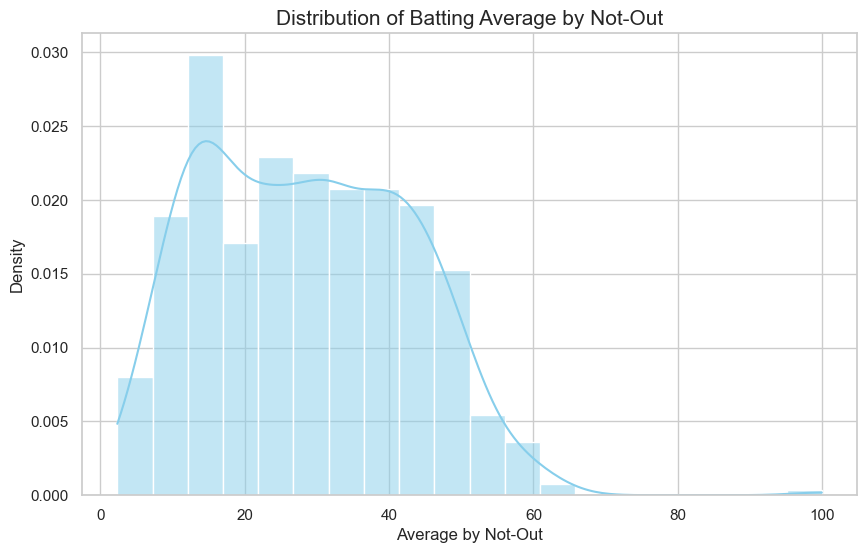

In [26]:
# Set the style
sns.set(style="whitegrid")

# 1. Distribution Plot for avgbynotout
plt.figure(figsize=(10, 6))
sns.histplot(cricdata["avgbynotout"], bins=20, kde=True, color="skyblue", stat="density")
plt.title('Distribution of Batting Average by Not-Out', fontsize=15)
plt.xlabel('Average by Not-Out', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

## INDIANS

In [27]:
# Filter Indian players by "(INDIA)" or "(ICC/INDIA)"
indians = cricdata[cricdata["Player"].str.contains(r'\(INDIA\)|\(ICC/INDIA\)', case=False, regex=True)].copy()

# Filter Bradman separately
bradman = cricdata[cricdata["Player"].str.contains("Bradman", case=False)].copy()

# Concatenate Bradman on top
cricdataind = pd.concat([bradman, indians], ignore_index=True)

# Reset index for cleanliness
cricdataind.reset_index(drop=True, inplace=True)

In [28]:
cricdataind.sort_values(by="avgbynotout",ascending=False).head(20
                                                               )

,Player,Startdate,Lastdate,Mat,Inn,NO,Runs,HS,Avg,100,50,0,career_length,runs_per_match,runs_per_inning,avgbynotout
0,DG Bradman (AUS),1928,1948,52,80,10,6996,334,99.94,29,13,7,21,134.538462,87.450000,99.942857
1,SR Tendulkar (INDIA),1989,2013,200,329,33,15921,248,53.78,51,68,14,25,79.605000,48.392097,53.787162
2,R Dravid (ICC/INDIA),1996,2012,164,286,32,13288,270,52.31,36,63,8,17,81.024390,46.461538,52.314961
3,SM Gavaskar (INDIA),1971,1987,125,214,16,10122,236,51.12,34,45,12,17,80.976000,47.299065,51.121212
10,CA Pujara (INDIA),2010,2019,75,124,8,5740,206,49.48,18,24,7,10,76.533333,46.290323,49.482759
5,V Sehwag (ICC/INDIA),2001,2013,104,180,6,8586,319,49.34,23,32,16,13,82.557692,47.700000,49.344828
49,VM Merchant (INDIA),1933,1951,10,18,0,859,154,47.72,3,3,2,19,85.900000,47.722222,47.722222
4,VVS Laxman (INDIA),1996,2012,134,225,34,8781,281,45.97,17,56,14,17,65.529851,39.026667,45.973822
8,M Azharuddin (INDIA),1984,2000,99,147,9,6215,199,45.03,22,21,5,17,62.777778,42.278912,45.036232
13,M Amarnath (INDIA),1969,1988,69,113,10,4378,138,42.50,11,24,12,20,63.449275,38.743363,42.504854


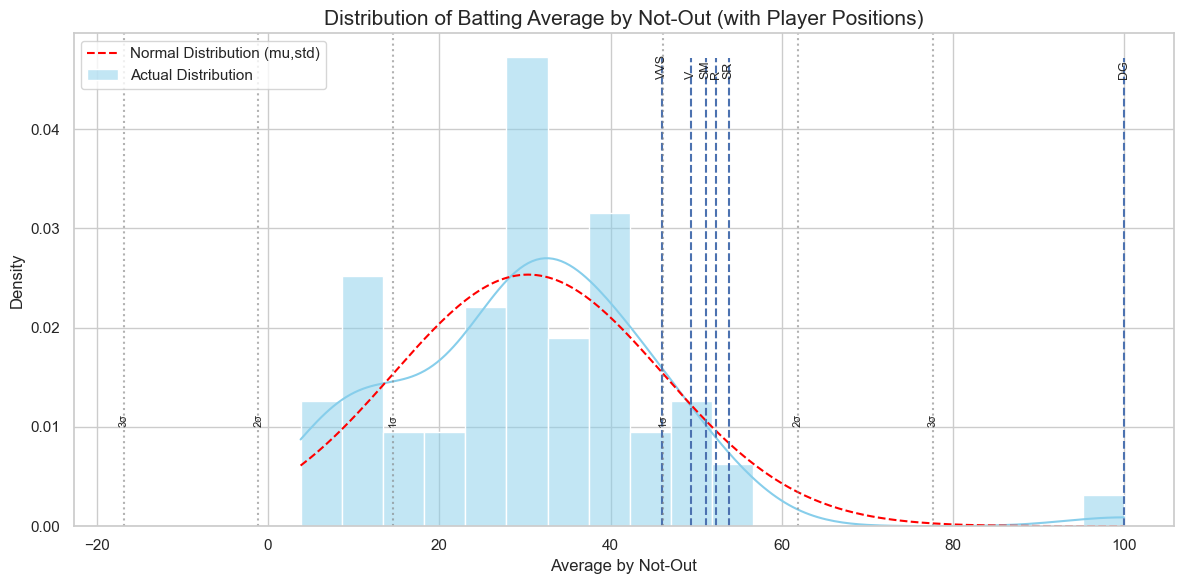

In [29]:
# 1. Compute mean and std
mean = cricdataind["avgbynotout"].mean()
std = cricdataind["avgbynotout"].std()

# 2. Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(cricdataind["avgbynotout"], bins=20, kde=True, color="skyblue", stat="density", label="Actual Distribution")

# 3. Plot Normal distribution curve for reference
x_vals = np.linspace(cricdataind["avgbynotout"].min(), cricdataind["avgbynotout"].max(), 200)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mean) / std)**2)
plt.plot(x_vals, normal_curve, color='red', linestyle='--', label='Normal Distribution (mu,std)')

# 4. Plot selected Indian players and Bradman
players_to_plot = ["SR Tendulkar", "R Dravid", "SM Gavaskar", "VVS Laxman", "V Sehwag", "DG Bradman"]

for player in players_to_plot:
    row = cricdataind[cricdataind["Player"].str.contains(player, case=False)]
    if not row.empty:
        val = row.iloc[0]["avgbynotout"]
        plt.axvline(val, linestyle="--", ymax=0.95)
        plt.text(val, 0.045, player.split()[0], rotation=90, va='bottom', ha='center', fontsize=9)

# 5. Plot standard deviation markers (μ ± σ, 2σ, 3σ)
for i in range(1, 4):
    for side in [-1, 1]:
        plt.axvline(mean + side*i*std, color="gray", linestyle=":", alpha=0.6)
        plt.text(mean + side*i*std, 0.01, f"{i}σ", rotation=90, va='bottom', ha='center', fontsize=8)

# 6. Labels
plt.title('Distribution of Batting Average by Not-Out (with Player Positions)', fontsize=15)
plt.xlabel('Average by Not-Out', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


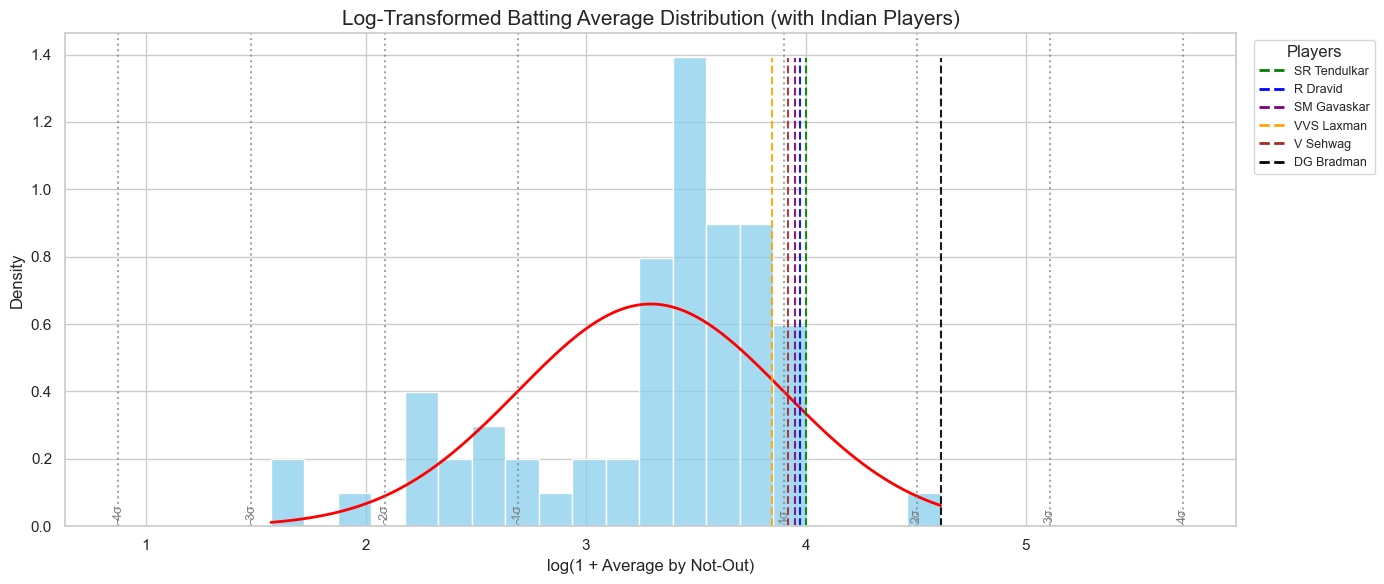

In [35]:

# Step 1: Log-transform
cricdataind["log_avg"] = np.log1p(cricdataind["avgbynotout"])

# Step 2: Extract and clean values
log_avgs = cricdataind["log_avg"].dropna()

# Step 3: Mean and std
mean = log_avgs.mean()
std = log_avgs.std()

# Step 4: Normal curve
x_vals = np.linspace(log_avgs.min(), log_avgs.max(), 200)
normal_curve = norm.pdf(x_vals, loc=mean, scale=std)

# Step 5: Plot histogram and normal curve
plt.figure(figsize=(14, 6))
sns.histplot(log_avgs, bins=20, kde=False, stat="density", color="skyblue", label="Log-Transformed Data")
plt.plot(x_vals, normal_curve, color="red", linewidth=2, label="Normal Curve")

# Step 6: Plot μ ± 1σ to 4σ
for i in range(1, 5):
    for side in [-1, 1]:
        sigma_val = mean + side * i * std
        plt.axvline(sigma_val, color="gray", linestyle=":", alpha=0.7)
        plt.text(sigma_val, 0.01, f"{i}σ" if side == 1 else f"-{i}σ",
                 rotation=90, va='bottom', ha='center', fontsize=9, color="gray")

# Step 7: Overlay players (with colored names + index legend)
players = ["SR Tendulkar", "R Dravid", "SM Gavaskar", "VVS Laxman", "V Sehwag", "DG Bradman"]
colors = ["green", "blue", "purple", "orange", "brown", "black"]

for player, color in zip(players, colors):
    row = cricdataind[cricdataind["Player"].str.contains(player, case=False)]
    if not row.empty:
        val = row["log_avg"].values[0]
        plt.axvline(val, linestyle="--", color=color, ymax=0.95, alpha=0.9, linewidth=1.5)

# Step 8: Manual color legend (index)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=col, lw=2, linestyle='--', label=player) 
                   for player, col in zip(players, colors)]

plt.legend(handles=legend_elements, title="Players", loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)

# Final touches
plt.title("Log-Transformed Batting Average Distribution (with Indian Players)", fontsize=15)
plt.xlabel("log(1 + Average by Not-Out)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()